<a href="https://colab.research.google.com/github/Sergiochueco-94/BWM/blob/main/df/BMW_E1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,LabelEncoder

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Entregable 1/bmw_pricing_v3.csv')

In [ ]:
df.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [ ]:
df.describe()

,km,potencia,precio
count,4.841000e+03,4842.000000,4837.000000
mean,1.409593e+05,128.981826,15831.920612
std,6.020853e+04,38.994839,9222.630708
min,-6.400000e+01,0.000000,100.000000
25%,1.028840e+05,100.000000,10800.000000
50%,1.410800e+05,120.000000,14200.000000
75%,1.752170e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000


In [ ]:
df.shape

(4843, 18)

In [ ]:
len(df)

4843

In [ ]:
df.isnull().sum()

marca                           970
modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

In [ ]:
len(df[df.duplicated()])

0

In [ ]:
df[df['precio']>=125000]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
4684,BMW,X4,103222.0,140.0,2014-08-01,diesel,grey,suv,True,True,False,NaN,True,False,True,True,142800.0,2018-08-01
4753,BMW,X3,72515.0,135.0,2013-03-01,diesel,blue,suv,False,False,True,NaN,False,NaN,False,True,178500.0,2018-08-01


In [ ]:
df[df['precio']<=3000]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
25,BMW,318,196092.0,85.0,1995-10-01,petrol,NaN,convertible,True,False,False,False,False,False,False,False,1800.0,2018-05-01
36,BMW,318,187294.0,105.0,NaN,petrol,NaN,convertible,True,False,False,False,False,True,True,NaN,2400.0,2018-06-01
46,BMW,318,187104.0,105.0,2001-09-01,petrol,red,convertible,True,False,False,False,False,True,True,False,2600.0,2018-08-01
56,BMW,320,329173.0,110.0,2004-07-01,diesel,silver,NaN,True,False,False,NaN,False,NaN,True,True,2300.0,2018-08-01
58,BMW,316,265751.0,85.0,NaN,petrol,silver,coupe,False,False,False,NaN,False,NaN,False,False,1000.0,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,BMW,X5,350316.0,170.0,NaN,petrol,black,NaN,True,False,False,NaN,False,False,True,True,3000.0,2018-03-01
4356,BMW,X3,79685.0,190.0,2014-02-01,diesel,black,suv,False,False,False,NaN,False,False,False,NaN,100.0,2018-05-01
4802,BMW,NaN,118640.0,110.0,NaN,diesel,white,NaN,False,False,False,NaN,False,False,False,False,800.0,2018-03-01
4806,BMW,218,118323.0,110.0,2014-09-01,diesel,white,NaN,False,False,False,NaN,False,False,False,False,800.0,2018-02-01


array([[<Axes: title={'center': 'precio'}>]], dtype=object)

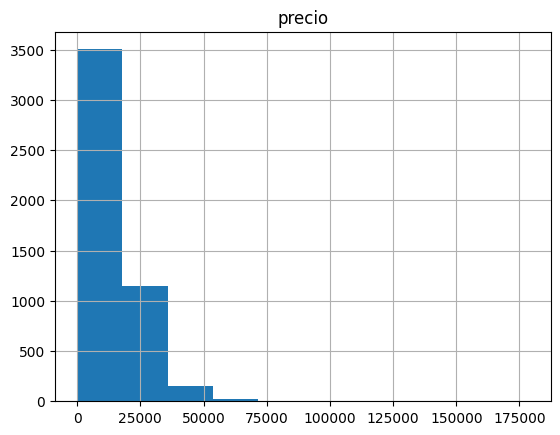

In [ ]:
df.hist('precio')

<Axes: xlabel='precio'>

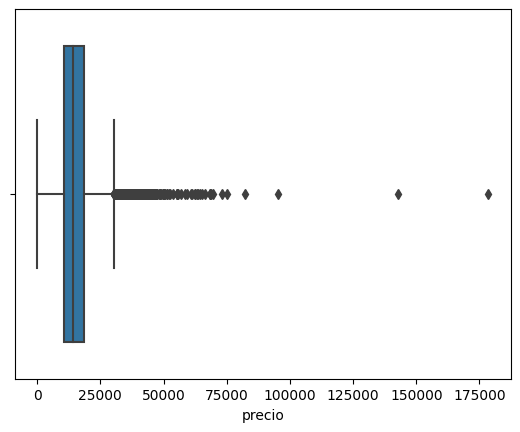

In [ ]:
sns.boxplot(x='precio', data = df)

In [ ]:
df1 = df.copy()

In [ ]:
df1['precio'].mean()

15831.920611949556

In [ ]:
media_precio = df1[(df1['precio']<125000) & (df1['precio']>3000)]['precio'].mean()

In [ ]:
df1['precio'] = np.where((df1['precio']<=3000) | (df1['precio']>=125000), media_precio, df1['precio'])

array([[<Axes: title={'center': 'precio'}>]], dtype=object)

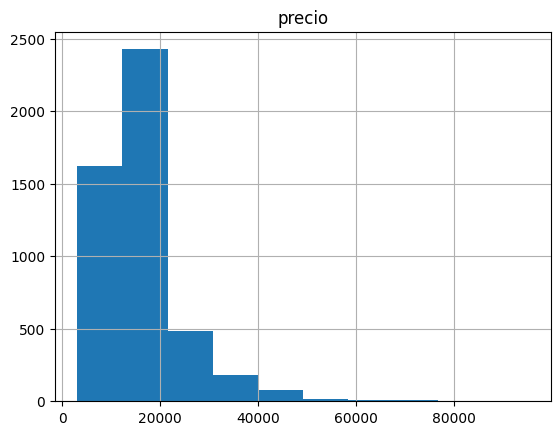

In [ ]:
df1.hist('precio')

<Axes: xlabel='precio'>

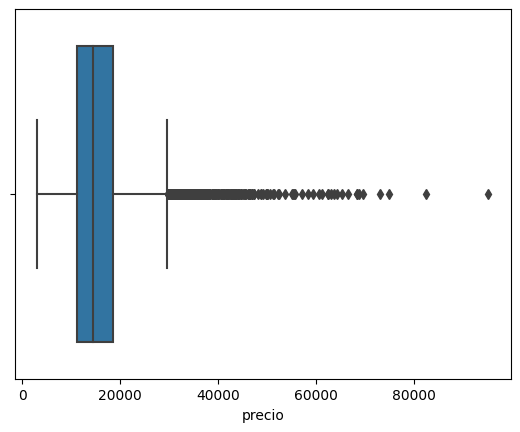

In [ ]:
sns.boxplot(x='precio', data = df1)

In [ ]:
df1.isnull().sum()

marca                           970
modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

In [ ]:
df1[df1['precio'].isnull()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
117,BMW,420,174740.0,135.0,2013-11-01,diesel,NaN,coupe,True,True,True,False,True,True,True,True,NaN,2018-05-01
524,BMW,520,163803.0,135.0,NaN,diesel,grey,estate,False,True,True,False,False,False,True,False,NaN,2018-02-01
539,BMW,316,34489.0,85.0,NaN,diesel,black,estate,True,False,False,NaN,False,False,True,False,NaN,2018-02-01
549,BMW,318,157129.0,100.0,NaN,diesel,blue,estate,True,NaN,True,False,True,False,True,True,NaN,2018-03-01
569,BMW,320,166866.0,120.0,NaN,diesel,blue,NaN,True,True,False,NaN,True,True,True,True,NaN,2018-03-01
584,BMW,320,114771.0,135.0,NaN,diesel,blue,NaN,False,True,False,NaN,False,False,True,False,NaN,2018-03-01


In [ ]:
df2 = df1.copy()

In [ ]:
df2['precio'].fillna(media_precio, inplace = True)

In [ ]:
df2.isnull().sum()

marca                           970
modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            0
fecha_venta                       1
dtype: int64

In [ ]:
df2[df2['km']<=0]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
2938,NaN,640 Gran Coupé,-64.0,230.0,NaN,diesel,black,sedan,True,True,False,NaN,False,False,True,True,75000.0,2018-04-01


In [ ]:
df2[df2['km']>=1.000376e+06]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
3732,BMW,118,1000376.0,90.0,2005-03-01,diesel,NaN,NaN,True,False,False,False,False,NaN,True,False,16136.591054,2018-06-01


array([[<Axes: title={'center': 'km'}>]], dtype=object)

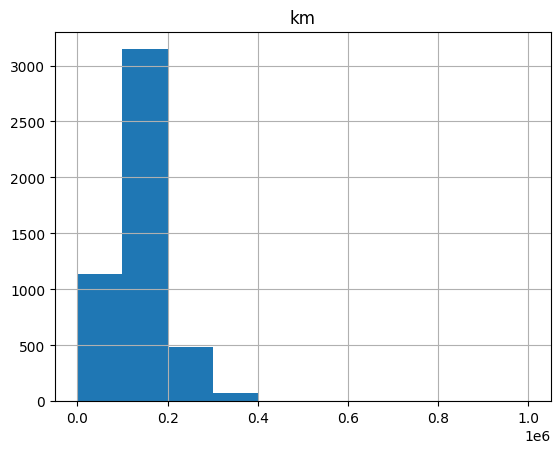

In [ ]:
df2.hist('km')

<Axes: xlabel='km'>

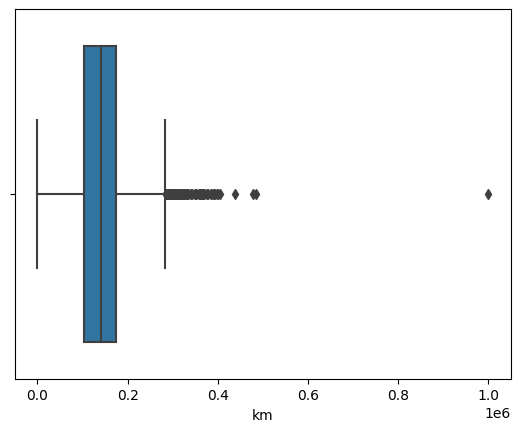

In [ ]:
sns.boxplot(x= 'km', data = df2)

In [ ]:
df2[df2['potencia']==25]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
1796,BMW,i3,152328.0,25.0,NaN,hybrid_petrol,black,NaN,False,True,False,NaN,False,False,True,NaN,20300.0,2018-04-01
1925,BMW,i3,152470.0,25.0,NaN,hybrid_petrol,black,hatchback,False,True,False,NaN,False,False,True,True,15500.0,2018-03-01


In [ ]:
df2[df2['potencia']>=350]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
3601,BMW,M5,150187.0,412.0,NaN,petrol,white,sedan,True,True,True,NaN,True,True,True,True,41600.0,2018-09-01
4146,NaN,X6 M,2970.0,423.0,2016-04-01,petrol,red,suv,True,NaN,True,False,False,False,True,True,82400.0,2018-04-01


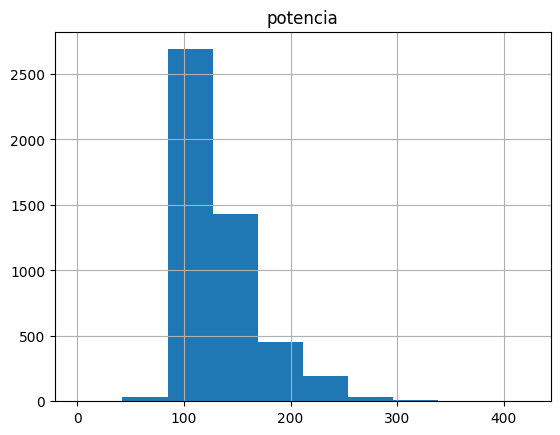

In [ ]:
df2.hist('potencia');

<Axes: xlabel='potencia'>

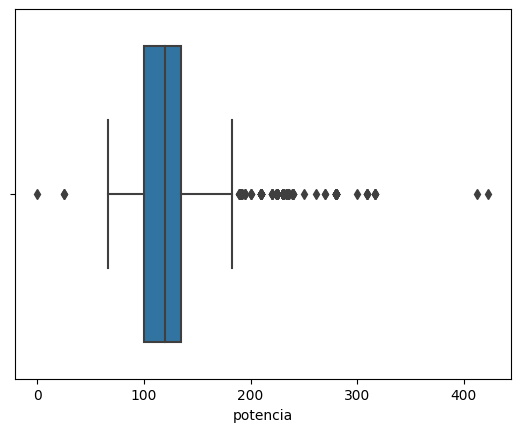

In [ ]:
sns.boxplot(x='potencia', data = df2)

In [ ]:
df2[df2['tipo_gasolina'] == 'hybrid_petrol'] # ver la relación de los hybrid_petro con la potencia

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
90,BMW,i8,12402.0,170.0,NaN,hybrid_petrol,grey,coupe,True,True,False,False,False,False,False,True,95200.0,2018-04-01
1796,BMW,i3,152328.0,25.0,NaN,hybrid_petrol,black,NaN,False,True,False,NaN,False,False,True,NaN,20300.0,2018-04-01
1925,BMW,i3,152470.0,25.0,NaN,hybrid_petrol,black,hatchback,False,True,False,NaN,False,False,True,True,15500.0,2018-03-01
2925,BMW,ActiveHybrid 5,94374.0,225.0,2012-05-01,hybrid_petrol,brown,sedan,True,True,False,False,True,True,True,True,21100.0,2018-04-01
3690,BMW,i3,6572.0,75.0,2015-11-01,hybrid_petrol,black,NaN,True,True,True,False,False,False,True,NaN,28000.0,2018-03-01
4018,BMW,X5,33639.0,180.0,NaN,hybrid_petrol,grey,suv,True,True,False,NaN,True,False,True,True,52200.0,2018-03-01
4214,BMW,X5,129317.0,230.0,NaN,hybrid_petrol,blue,suv,True,False,False,False,False,False,True,True,46300.0,2018-04-01
4370,BMW,X6,134154.0,300.0,NaN,hybrid_petrol,black,NaN,True,True,False,True,True,False,True,True,22000.0,2018-06-01


In [ ]:
df2['fecha_venta'].unique()

array(['2018-01-01', '2018-02-01', '2018-04-01', '2018-03-01',
       '2018-09-01', '2018-05-01', '2018-06-01', '2018-07-01',
       '2018-08-01', '2007-08-01', '2010-04-01', '2009-04-01',
       '2008-06-01', nan], dtype=object)

In [ ]:
df2['fecha_registro'].unique()

array(['2012-02-01', nan, '2012-04-01', '2011-05-01', '2009-08-01',
       '2014-03-01', '2015-08-01', '2009-01-01', '2008-04-01',
       '2015-07-01', '2009-05-01', '2013-02-01', '2014-10-01',
       '1995-10-01', '2005-05-01', '2014-04-01', '2016-03-01',
       '2008-07-01', '2001-09-01', '2014-05-01', '2012-05-01',
       '2008-03-01', '2014-01-01', '2016-07-01', '2004-07-01',
       '2013-01-01', '2013-11-01', '2015-09-01', '2014-11-01',
       '2015-02-01', '2012-03-01', '2011-03-01', '2012-01-01',
       '2014-08-01', '2014-02-01', '2007-07-01', '2011-12-01',
       '2014-07-01', '2015-03-01', '2012-09-01', '2016-01-01',
       '2010-11-01', '2013-10-01', '2009-07-01', '2017-11-01',
       '2009-09-01', '2010-05-01', '2007-11-01', '2008-05-01',
       '2001-04-01', '2010-12-01', '2013-03-01', '2014-06-01',
       '2013-06-01', '2014-12-01', '2015-05-01', '2013-05-01',
       '2012-11-01', '2013-04-01', '2013-09-01', '2013-12-01',
       '2012-10-01', '2005-03-01', '2009-10-01', '

In [ ]:
df2[df2['km'].isnull()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
459,BMW,520,NaN,135.0,2012-12-01,diesel,black,NaN,True,True,True,False,True,True,True,True,20300.0,2018-02-01
4811,BMW,X3,NaN,190.0,NaN,diesel,blue,van,True,True,True,True,True,False,True,True,19500.0,2018-07-01


In [ ]:
df3 = df2.copy()

In [ ]:
df3['km'].mean()

140959.347862012

In [ ]:
df3['km'].median()

141080.0

In [ ]:
media_km=df3[df3["km"]>0]['km'].mean()

In [ ]:
df3['km'] = np.where(df3['km']<=0,media_km,df3['km'])

array([[<Axes: title={'center': 'km'}>]], dtype=object)

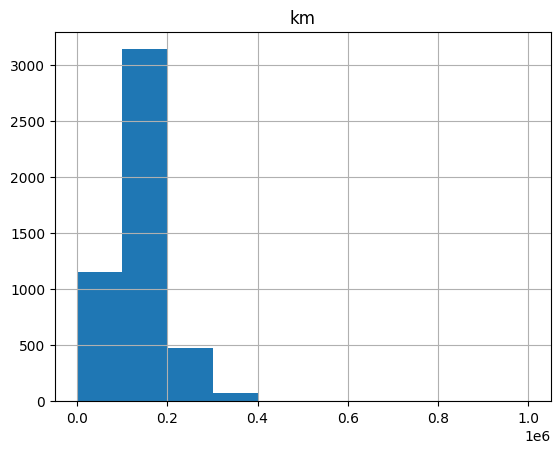

In [ ]:
df3.hist('km')

In [ ]:
df3['km'].fillna(media_km, inplace= True)

In [ ]:
df4 = df3.copy()

In [ ]:
df4[df4['potencia']<=75]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
1796,BMW,i3,152328.0,25.0,NaN,hybrid_petrol,black,NaN,False,True,False,NaN,False,False,True,NaN,20300.000000,2018-04-01
1804,NaN,114,179307.0,70.0,NaN,diesel,blue,hatchback,False,True,False,NaN,False,False,True,False,8300.000000,2018-07-01
1847,BMW,114,100398.0,70.0,NaN,diesel,white,hatchback,False,True,False,NaN,False,True,True,False,10700.000000,2018-02-01
1895,BMW,i3,26542.0,75.0,2014-03-01,electro,grey,NaN,False,NaN,False,NaN,False,NaN,True,True,20900.000000,2018-02-01
1925,BMW,i3,152470.0,25.0,NaN,hybrid_petrol,black,hatchback,False,True,False,NaN,False,False,True,True,15500.000000,2018-03-01
1983,BMW,114,57344.0,70.0,NaN,diesel,grey,NaN,False,True,False,NaN,False,False,True,False,11800.000000,2018-03-01
1988,BMW,114,150373.0,70.0,2013-06-01,diesel,brown,hatchback,False,True,False,NaN,False,False,True,False,8200.000000,2018-03-01
2001,NaN,114,72527.0,70.0,2013-11-01,diesel,silver,NaN,False,NaN,False,NaN,False,NaN,True,False,9300.000000,2018-03-01
2168,BMW,114,15546.0,75.0,2014-04-01,petrol,black,hatchback,False,False,False,NaN,False,NaN,True,NaN,10800.000000,2018-05-01
2196,BMW,114,52299.0,75.0,2013-01-01,petrol,black,NaN,False,False,False,False,True,True,True,False,13400.000000,2018-09-01


In [ ]:
df4.replace({25:75}, inplace = True)

In [ ]:
df4[df4['tipo_gasolina']== 'hybrid_petrol']

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
90,BMW,i8,12402.0,170.0,NaN,hybrid_petrol,grey,coupe,True,True,False,False,False,False,False,True,95200.0,2018-04-01
1796,BMW,i3,152328.0,75.0,NaN,hybrid_petrol,black,NaN,False,True,False,NaN,False,False,True,NaN,20300.0,2018-04-01
1925,BMW,i3,152470.0,75.0,NaN,hybrid_petrol,black,hatchback,False,True,False,NaN,False,False,True,True,15500.0,2018-03-01
2925,BMW,ActiveHybrid 5,94374.0,225.0,2012-05-01,hybrid_petrol,brown,sedan,True,True,False,False,True,True,True,True,21100.0,2018-04-01
3690,BMW,i3,6572.0,75.0,2015-11-01,hybrid_petrol,black,NaN,True,True,True,False,False,False,True,NaN,28000.0,2018-03-01
4018,BMW,X5,33639.0,180.0,NaN,hybrid_petrol,grey,suv,True,True,False,NaN,True,False,True,True,52200.0,2018-03-01
4214,BMW,X5,129317.0,230.0,NaN,hybrid_petrol,blue,suv,True,False,False,False,False,False,True,True,46300.0,2018-04-01
4370,BMW,X6,134154.0,300.0,NaN,hybrid_petrol,black,NaN,True,True,False,True,True,False,True,True,22000.0,2018-06-01


In [ ]:
df4[df4['potencia']==0]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
3765,BMW,X1,81770.0,0.0,2014-10-01,diesel,white,suv,False,False,False,False,False,False,False,NaN,11700.0,2018-03-01


In [ ]:
df4['potencia'].mean()

129.00247831474599

In [ ]:
media_potencia = df4[df4['potencia']>0]['potencia'].mean()

In [ ]:
df4['potencia'] = np.where(df4['potencia']==0,media_potencia, df4['potencia'])

In [ ]:
df4.loc[3765,:]

marca                                 BMW
modelo                                 X1
km                                81770.0
potencia                       129.029126
fecha_registro                 2014-10-01
tipo_gasolina                      diesel
color                               white
tipo_coche                            suv
volante_regulable                   False
aire_acondicionado                  False
camara_trasera                      False
asientos_traseros_plegables         False
elevalunas_electrico                False
bluetooth                           False
gps                                 False
alerta_lim_velocidad                  NaN
precio                            11700.0
fecha_venta                    2018-03-01
Name: 3765, dtype: object

In [ ]:
df4['fecha_venta']=pd.to_datetime(df4['fecha_venta'])

In [ ]:
df4['fecha_registro']=pd.to_datetime(df4['fecha_registro'])

array([[<Axes: title={'center': 'fecha_registro'}>]], dtype=object)

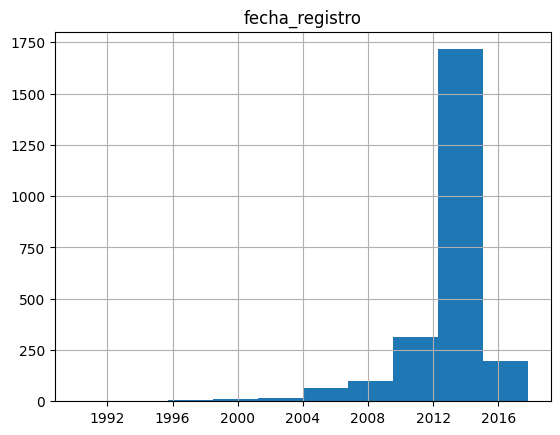

In [ ]:
df4.hist('fecha_registro')

array([[<Axes: title={'center': 'fecha_venta'}>]], dtype=object)

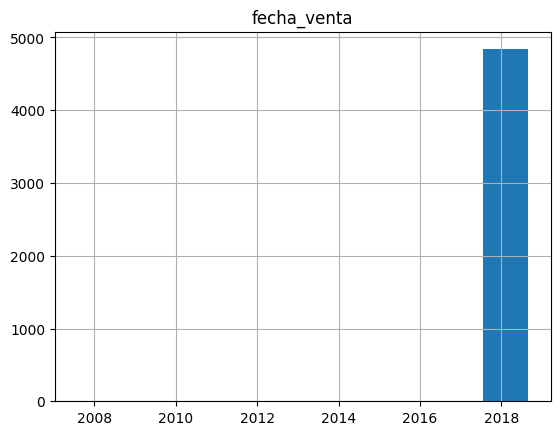

In [ ]:
df4.hist('fecha_venta')

In [ ]:
for col in ['fecha_venta','fecha_registro']:
    df4[col + '_NOMBREDIA'] = df4[col].dt.day_name()
    df4[col + '_ANIO'] = df4[col].dt.year

    df4[col + '_DIA'] = df4[col].dt.day
    df4[col + '_MES'] = df4[col].dt.month
    df4[col + '_ANIO'] = df4[col].dt.year

    del df4[col]
df4.head()

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,...,alerta_lim_velocidad,precio,fecha_venta_NOMBREDIA,fecha_venta_ANIO,fecha_venta_DIA,fecha_venta_MES,fecha_registro_NOMBREDIA,fecha_registro_ANIO,fecha_registro_DIA,fecha_registro_MES
0,NaN,118,140411.0,100.0,diesel,black,NaN,True,True,False,...,NaN,11300.0,Monday,2018.0,1.0,1.0,Wednesday,2012.0,1.0,2.0
1,BMW,M4,13929.0,317.0,petrol,grey,convertible,True,True,False,...,True,69700.0,Thursday,2018.0,1.0,2.0,NaN,NaN,NaN,NaN
2,BMW,320,183297.0,120.0,diesel,white,NaN,False,False,False,...,False,10200.0,Thursday,2018.0,1.0,2.0,Sunday,2012.0,1.0,4.0
3,BMW,420,128035.0,135.0,diesel,red,convertible,True,True,False,...,NaN,25100.0,Thursday,2018.0,1.0,2.0,NaN,NaN,NaN,NaN
4,BMW,425,97097.0,160.0,diesel,silver,NaN,True,True,False,...,True,33400.0,Sunday,2018.0,1.0,4.0,NaN,NaN,NaN,NaN


In [ ]:
df5 = df4.copy()

In [ ]:
df5["gps"].value_counts()

True     4514
False     329
Name: gps, dtype: int64

In [ ]:
df5["gps_int"]=df5["gps"].astype(int)

In [ ]:
df5["gps_int"].value_counts()

1    4514
0     329
Name: gps_int, dtype: int64

In [ ]:
df6 = df5.copy()

In [ ]:
del(df6['gps'])

In [ ]:
df6.head()

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,...,precio,fecha_venta_NOMBREDIA,fecha_venta_ANIO,fecha_venta_DIA,fecha_venta_MES,fecha_registro_NOMBREDIA,fecha_registro_ANIO,fecha_registro_DIA,fecha_registro_MES,gps_int
0,NaN,118,140411.0,100.0,diesel,black,NaN,True,True,False,...,11300.0,Monday,2018.0,1.0,1.0,Wednesday,2012.0,1.0,2.0,1
1,BMW,M4,13929.0,317.0,petrol,grey,convertible,True,True,False,...,69700.0,Thursday,2018.0,1.0,2.0,NaN,NaN,NaN,NaN,1
2,BMW,320,183297.0,120.0,diesel,white,NaN,False,False,False,...,10200.0,Thursday,2018.0,1.0,2.0,Sunday,2012.0,1.0,4.0,1
3,BMW,420,128035.0,135.0,diesel,red,convertible,True,True,False,...,25100.0,Thursday,2018.0,1.0,2.0,NaN,NaN,NaN,NaN,1
4,BMW,425,97097.0,160.0,diesel,silver,NaN,True,True,False,...,33400.0,Sunday,2018.0,1.0,4.0,NaN,NaN,NaN,NaN,1


In [ ]:
df6['marca'].nunique()

1

In [ ]:
df6['marca'].unique()

array([nan, 'BMW'], dtype=object)

In [ ]:
df6['marca'].fillna('BMW',inplace=True)

In [ ]:
df6.isnull().sum()

marca                             0
modelo                            3
km                                0
potencia                          1
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
alerta_lim_velocidad            728
precio                            0
fecha_venta_NOMBREDIA             1
fecha_venta_ANIO                  1
fecha_venta_DIA                   1
fecha_venta_MES                   1
fecha_registro_NOMBREDIA       2423
fecha_registro_ANIO            2423
fecha_registro_DIA             2423
fecha_registro_MES             2423
gps_int                           0
dtype: int64

In [ ]:
df1[df1['modelo'].isnull()]

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,...,fecha_venta_NOMBREDIA,fecha_venta_ANIO,fecha_venta_DIA,fecha_venta_MES,fecha_registro_HORA,fecha_registro_NOMBREDIA,fecha_registro_ANIO,fecha_registro_DIA,fecha_registro_MES,gps_int
173,BMW,NaN,146338.0,105.0,diesel,black,NaN,False,True,False,...,Wednesday,2018.0,1.0,8.0,NaN,NaN,NaN,NaN,NaN,1
4766,BMW,NaN,115566.0,105.0,diesel,silver,suv,False,True,False,...,Saturday,2018.0,1.0,9.0,0.0,Wednesday,2014.0,1.0,1.0,1
4802,BMW,NaN,118640.0,110.0,diesel,white,NaN,False,False,False,...,Thursday,2018.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
df1['modelo'].unique()

array(['118', 'M4', '320', '420', '425', '335', '325', 'Z4', '120', '220',
       '650', '135', '218', '318', '430', 'M3', '330', '225', 'M235',
       '316', '435', '640', '640 Gran Coupé', '435 Gran Coupé', 'i8',
       '630', '430 Gran Coupé', '635', '520', nan, '525', '530', '535',
       '320 Gran Turismo', '518', '116', '328', '523', 'X3', 'M550',
       '528', '325 Gran Turismo', '125', '318 Gran Turismo',
       '420 Gran Coupé', 'i3', '114', '520 Gran Turismo',
       '530 Gran Turismo', 'M135', '418 Gran Coupé', '330 Gran Turismo',
       '335 Gran Turismo', '730', '123', '535 Gran Turismo', '740', '750',
       'ActiveHybrid 5', '735', 'M5', 'X5', 'X1', 'X4', 'X6', 'X6 M',
       'X5 M', 'X5 M50', '218 Active Tourer', '218 Gran Tourer', '216',
       '220 Active Tourer', '216 Gran Tourer', '216 Active Tourer',
       ' Active Tourer', '225 Active Tourer', '214 Gran Tourer'],
      dtype=object)

In [ ]:
df1[df1['modelo']=='118']  #Comprobar si seguían alguna lógica o patrón modelo y tipo_coche

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,...,fecha_venta_NOMBREDIA,fecha_venta_ANIO,fecha_venta_DIA,fecha_venta_MES,fecha_registro_HORA,fecha_registro_NOMBREDIA,fecha_registro_ANIO,fecha_registro_DIA,fecha_registro_MES,gps_int
0,BMW,118,140411.0,100.0,diesel,black,NaN,True,True,False,...,Monday,2018.0,1.0,1.0,0.0,Wednesday,2012.0,1.0,2.0,1
7,BMW,118,115560.0,105.0,petrol,white,convertible,True,True,False,...,Thursday,2018.0,1.0,2.0,0.0,Saturday,2009.0,1.0,8.0,1
30,BMW,118,195114.0,105.0,diesel,red,NaN,True,True,False,...,Tuesday,2018.0,1.0,5.0,NaN,NaN,NaN,NaN,NaN,1
49,BMW,118,147180.0,100.0,diesel,NaN,coupe,True,NaN,True,...,Sunday,2018.0,1.0,7.0,0.0,Tuesday,2012.0,1.0,5.0,1
136,BMW,118,140464.0,105.0,diesel,blue,coupe,False,False,False,...,Wednesday,2018.0,1.0,8.0,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3721,BMW,118,54093.0,110.0,diesel,black,NaN,False,True,False,...,Tuesday,2018.0,1.0,5.0,0.0,Thursday,2015.0,1.0,10.0,1
3723,BMW,118,186916.0,100.0,diesel,grey,NaN,False,False,False,...,Tuesday,2018.0,1.0,5.0,0.0,Monday,2008.0,1.0,9.0,1
3725,BMW,118,119724.0,100.0,diesel,NaN,subcompact,False,True,False,...,Friday,2018.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN,1
3732,BMW,118,1000376.0,90.0,diesel,NaN,NaN,True,False,False,...,Friday,2018.0,1.0,6.0,0.0,Tuesday,2005.0,1.0,3.0,1


In [ ]:
df1.drop(df1[df1['modelo'].isnull()].index,inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4840 entries, 0 to 4842
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        4840 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4838 non-null   float64
 3   potencia                     4839 non-null   float64
 4   tipo_gasolina                4835 non-null   object 
 5   color                        4395 non-null   object 
 6   tipo_coche                   3382 non-null   object 
 7   volante_regulable            4836 non-null   object 
 8   aire_acondicionado           4354 non-null   object 
 9   camara_trasera               4838 non-null   object 
 10  asientos_traseros_plegables  1452 non-null   object 
 11  elevalunas_electrico         4838 non-null   object 
 12  bluetooth                    4113 non-null   object 
 13  alerta_lim_velocid

In [ ]:
df1.reset_index(drop=True,inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4840 entries, 0 to 4839
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        4840 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4838 non-null   float64
 3   potencia                     4839 non-null   float64
 4   tipo_gasolina                4835 non-null   object 
 5   color                        4395 non-null   object 
 6   tipo_coche                   3382 non-null   object 
 7   volante_regulable            4836 non-null   object 
 8   aire_acondicionado           4354 non-null   object 
 9   camara_trasera               4838 non-null   object 
 10  asientos_traseros_plegables  1452 non-null   object 
 11  elevalunas_electrico         4838 non-null   object 
 12  bluetooth                    4113 non-null   object 
 13  alerta_lim_velocid

In [ ]:
df2.isnull().sum()

marca                             0
modelo                            0
km                                0
potencia                          1
tipo_gasolina                     5
color                           445
tipo_coche                     1458
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3388
elevalunas_electrico              2
bluetooth                       727
alerta_lim_velocidad            727
precio                            6
fecha_venta_HORA                  1
fecha_venta_NOMBREDIA             1
fecha_venta_ANIO                  1
fecha_venta_DIA                   1
fecha_venta_MES                   1
fecha_registro_HORA            2421
fecha_registro_NOMBREDIA       2421
fecha_registro_ANIO            2421
fecha_registro_DIA             2421
fecha_registro_MES             2421
gps_int                           0
dtype: int64

In [ ]:
df2.loc[2938,:]

marca                               BMW
modelo                              316
km                             168104.0
potencia                           85.0
tipo_gasolina                    diesel
color                              blue
tipo_coche                          NaN
volante_regulable                 False
aire_acondicionado                 True
camara_trasera                    False
asientos_traseros_plegables         NaN
elevalunas_electrico               True
bluetooth                         False
alerta_lim_velocidad              False
precio                          12500.0
fecha_venta_HORA                    0.0
fecha_venta_NOMBREDIA            Sunday
fecha_venta_ANIO                 2018.0
fecha_venta_DIA                     1.0
fecha_venta_MES                     4.0
fecha_registro_HORA                 NaN
fecha_registro_NOMBREDIA            NaN
fecha_registro_ANIO                 NaN
fecha_registro_DIA                  NaN
fecha_registro_MES                  NaN


In [ ]:
df2[df2['precio'] <1000]

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,...,fecha_venta_NOMBREDIA,fecha_venta_ANIO,fecha_venta_DIA,fecha_venta_MES,fecha_registro_HORA,fecha_registro_NOMBREDIA,fecha_registro_ANIO,fecha_registro_DIA,fecha_registro_MES,gps_int
165,BMW,320,209208.0,135.0,diesel,black,estate,False,NaN,False,...,Sunday,2018.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,0
170,BMW,320,146639.0,135.0,diesel,silver,estate,False,True,False,...,Sunday,2018.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,1
171,BMW,316,159983.0,85.0,diesel,grey,estate,False,False,False,...,Sunday,2018.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,0
186,BMW,320,101013.0,120.0,diesel,blue,estate,False,True,False,...,Tuesday,2018.0,1.0,5.0,NaN,NaN,NaN,NaN,NaN,1
187,BMW,316,130019.0,85.0,diesel,white,estate,False,False,False,...,Thursday,2018.0,1.0,3.0,0.0,Friday,2014.0,1.0,8.0,0
196,BMW,320,165516.0,135.0,diesel,blue,estate,False,False,False,...,Tuesday,2018.0,1.0,5.0,NaN,NaN,NaN,NaN,NaN,1
201,BMW,318,170164.0,105.0,diesel,grey,NaN,False,True,False,...,Tuesday,2018.0,1.0,5.0,NaN,NaN,NaN,NaN,NaN,1
212,BMW,330,127461.0,190.0,diesel,silver,estate,False,True,False,...,Tuesday,2018.0,1.0,5.0,NaN,NaN,NaN,NaN,NaN,1
221,BMW,318,147097.0,105.0,diesel,NaN,estate,False,False,False,...,Thursday,2018.0,1.0,3.0,0.0,Wednesday,2013.0,1.0,5.0,0
244,BMW,320,150969.0,135.0,diesel,blue,estate,False,False,False,...,Monday,2018.0,1.0,1.0,0.0,Sunday,2012.0,1.0,1.0,1


In [ ]:
df3 = df2.copy()

In [ ]:
df3.isnull().sum()

marca                             0
modelo                            0
km                                0
potencia                          1
tipo_gasolina                     5
color                           445
tipo_coche                     1458
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3388
elevalunas_electrico              2
bluetooth                       727
alerta_lim_velocidad            727
precio                            6
fecha_venta_HORA                  1
fecha_venta_NOMBREDIA             1
fecha_venta_ANIO                  1
fecha_venta_DIA                   1
fecha_venta_MES                   1
fecha_registro_HORA            2421
fecha_registro_NOMBREDIA       2421
fecha_registro_ANIO            2421
fecha_registro_DIA             2421
fecha_registro_MES             2421
gps_int                           0
dtype: int64

In [ ]:
df3['potencia'].fillna(media_potencia,inplace=True)

In [ ]:
df3.isnull().sum()

marca                             0
modelo                            0
km                                0
potencia                          0
tipo_gasolina                     5
color                           445
tipo_coche                     1458
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3388
elevalunas_electrico              2
bluetooth                       727
alerta_lim_velocidad            727
precio                            6
fecha_venta_HORA                  1
fecha_venta_NOMBREDIA             1
fecha_venta_ANIO                  1
fecha_venta_DIA                   1
fecha_venta_MES                   1
fecha_registro_HORA            2421
fecha_registro_NOMBREDIA       2421
fecha_registro_ANIO            2421
fecha_registro_DIA             2421
fecha_registro_MES             2421
gps_int                           0
dtype: int64

array([[<Axes: title={'center': 'potencia'}>]], dtype=object)

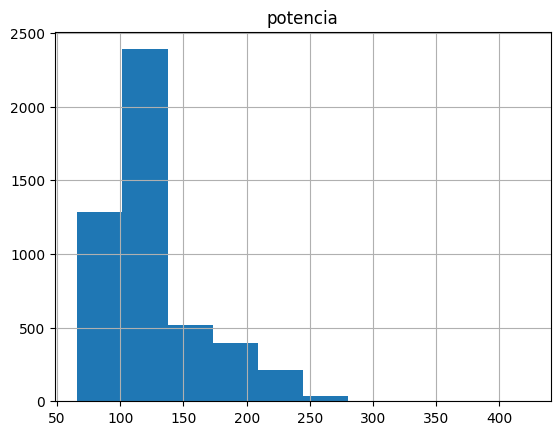

In [ ]:
df3.hist('potencia')

In [ ]:
df4['tipo_gasolina'].value_counts()

diesel           4628
petrol            191
hybrid_petrol       8
Diesel              5
electro             3
Name: tipo_gasolina, dtype: int64

In [ ]:
df4[df4['tipo_gasolina'].isnull()]

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,...,fecha_venta_NOMBREDIA,fecha_venta_ANIO,fecha_venta_DIA,fecha_venta_MES,fecha_registro_HORA,fecha_registro_NOMBREDIA,fecha_registro_ANIO,fecha_registro_DIA,fecha_registro_MES,gps_int
82,BMW,420,54993.0,135.0,NaN,black,NaN,False,False,False,...,Thursday,2018.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,0
184,BMW,320,186697.0,135.0,NaN,white,estate,False,False,False,...,Sunday,2018.0,1.0,4.0,0.0,Thursday,2012.0,1.0,11.0,0
443,BMW,318,111622.0,100.0,NaN,black,estate,True,True,False,...,Thursday,2018.0,1.0,2.0,0.0,Tuesday,2013.0,1.0,1.0,1
479,BMW,318,170350.0,105.0,NaN,white,NaN,False,True,False,...,Thursday,2018.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,1
629,BMW,318,147558.0,105.0,NaN,white,estate,False,NaN,False,...,Thursday,2018.0,1.0,3.0,0.0,Saturday,2014.0,1.0,11.0,0


In [ ]:
df5 = df4.copy()

In [ ]:
df5['tipo_gasolina'].fillna('SIN TIPO', inplace = True)

In [ ]:
df5['tipo_gasolina'].value_counts()

diesel           4628
petrol            191
hybrid_petrol       8
SIN TIPO            5
Diesel              5
electro             3
Name: tipo_gasolina, dtype: int64

In [ ]:
df5['color'].value_counts()

black     1498
grey      1070
blue       647
white      483
brown      302
silver     291
red         47
beige       37
green       14
orange       6
Name: color, dtype: int64

In [ ]:
df5[df5['color'].isnull()]

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,...,fecha_venta_NOMBREDIA,fecha_venta_ANIO,fecha_venta_DIA,fecha_venta_MES,fecha_registro_HORA,fecha_registro_NOMBREDIA,fecha_registro_ANIO,fecha_registro_DIA,fecha_registro_MES,gps_int
14,BMW,120,174631.0,120.0,diesel,NaN,convertible,True,True,False,...,Sunday,2018.0,1.0,4.0,0.0,Thursday,2009.0,1.0,1.0,1
18,BMW,325,205474.0,145.0,diesel,NaN,NaN,True,True,False,...,Sunday,2018.0,1.0,4.0,0.0,Friday,2009.0,1.0,5.0,1
25,BMW,318,196092.0,85.0,petrol,NaN,convertible,True,False,False,...,Tuesday,2018.0,1.0,5.0,0.0,Sunday,1995.0,1.0,10.0,0
36,BMW,318,187294.0,105.0,petrol,NaN,convertible,True,False,False,...,Friday,2018.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN,1
47,BMW,420,20996.0,135.0,petrol,NaN,coupe,True,False,False,...,Sunday,2018.0,1.0,4.0,0.0,Thursday,2014.0,1.0,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4756,BMW,X4,61989.0,140.0,diesel,NaN,NaN,False,False,False,...,Saturday,2018.0,1.0,9.0,0.0,Monday,2014.0,1.0,12.0,0
4775,BMW,X5,285669.0,173.0,diesel,NaN,NaN,True,True,False,...,Saturday,2018.0,1.0,9.0,0.0,Wednesday,2007.0,1.0,8.0,1
4802,BMW,218 Active Tourer,35382.0,110.0,diesel,NaN,van,False,NaN,False,...,Thursday,2018.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,1
4815,BMW,X3,110039.0,130.0,diesel,NaN,NaN,False,NaN,False,...,Tuesday,2018.0,1.0,5.0,0.0,Wednesday,2009.0,1.0,7.0,1


In [ ]:
df6 = df5.copy()

In [ ]:
df6['color'].fillna('SIN COLOR', inplace = True)

In [ ]:
df6['color'].value_counts()

black        1498
grey         1070
blue          647
white         483
SIN COLOR     445
brown         302
silver        291
red            47
beige          37
green          14
orange          6
Name: color, dtype: int64

In [ ]:
df6.isnull().sum()

marca                             0
modelo                            0
km                                0
potencia                          0
tipo_gasolina                     0
color                             0
tipo_coche                     1458
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3388
elevalunas_electrico              2
bluetooth                       727
alerta_lim_velocidad            727
precio                            6
fecha_venta_HORA                  1
fecha_venta_NOMBREDIA             1
fecha_venta_ANIO                  1
fecha_venta_DIA                   1
fecha_venta_MES                   1
fecha_registro_HORA            2421
fecha_registro_NOMBREDIA       2421
fecha_registro_ANIO            2421
fecha_registro_DIA             2421
fecha_registro_MES             2421
gps_int                           0
dtype: int64

In [ ]:
df6['tipo_coche'].value_counts()

estate         1107
sedan           821
suv             754
hatchback       488
subcompact       77
coupe            76
convertible      30
van              29
Name: tipo_coche, dtype: int64

In [ ]:
df6[df6['tipo_coche'].isnull()]

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,...,fecha_venta_NOMBREDIA,fecha_venta_ANIO,fecha_venta_DIA,fecha_venta_MES,fecha_registro_HORA,fecha_registro_NOMBREDIA,fecha_registro_ANIO,fecha_registro_DIA,fecha_registro_MES,gps_int
0,BMW,118,140411.0,100.0,diesel,black,NaN,True,True,False,...,Monday,2018.0,1.0,1.0,0.0,Wednesday,2012.0,1.0,2.0,1
2,BMW,320,183297.0,120.0,diesel,white,NaN,False,False,False,...,Thursday,2018.0,1.0,2.0,0.0,Sunday,2012.0,1.0,4.0,1
4,BMW,425,97097.0,160.0,diesel,silver,NaN,True,True,False,...,Sunday,2018.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,1
5,BMW,335,152352.0,225.0,petrol,black,NaN,True,True,False,...,Thursday,2018.0,1.0,2.0,0.0,Sunday,2011.0,1.0,5.0,1
11,BMW,325,228000.0,145.0,diesel,black,NaN,True,True,False,...,Thursday,2018.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4827,BMW,216 Gran Tourer,48012.0,85.0,diesel,blue,NaN,True,True,False,...,Friday,2018.0,1.0,6.0,0.0,Monday,2016.0,1.0,2.0,1
4831,BMW,218 Gran Tourer,47782.0,110.0,diesel,blue,NaN,False,NaN,False,...,Sunday,2018.0,1.0,7.0,NaN,NaN,NaN,NaN,NaN,1
4835,BMW,218 Gran Tourer,39743.0,110.0,diesel,black,NaN,False,True,False,...,Wednesday,2018.0,1.0,8.0,NaN,NaN,NaN,NaN,NaN,1
4836,BMW,218 Active Tourer,49832.0,100.0,diesel,grey,NaN,False,True,False,...,Wednesday,2018.0,1.0,8.0,0.0,Monday,2015.0,1.0,6.0,1


In [ ]:
df6[df6['modelo'] == '118'] #para ver su podiamos asignar alguna relacion segun el modelo u otras comparaciones y poder sacar un modelo concreto

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,...,fecha_venta_NOMBREDIA,fecha_venta_ANIO,fecha_venta_DIA,fecha_venta_MES,fecha_registro_HORA,fecha_registro_NOMBREDIA,fecha_registro_ANIO,fecha_registro_DIA,fecha_registro_MES,gps_int
0,BMW,118,140411.0,100.0,diesel,black,NaN,True,True,False,...,Monday,2018.0,1.0,1.0,0.0,Wednesday,2012.0,1.0,2.0,1
7,BMW,118,115560.0,105.0,petrol,white,convertible,True,True,False,...,Thursday,2018.0,1.0,2.0,0.0,Saturday,2009.0,1.0,8.0,1
30,BMW,118,195114.0,105.0,diesel,red,NaN,True,True,False,...,Tuesday,2018.0,1.0,5.0,NaN,NaN,NaN,NaN,NaN,1
49,BMW,118,147180.0,100.0,diesel,SIN COLOR,coupe,True,NaN,True,...,Sunday,2018.0,1.0,7.0,0.0,Tuesday,2012.0,1.0,5.0,1
136,BMW,118,140464.0,105.0,diesel,blue,coupe,False,False,False,...,Wednesday,2018.0,1.0,8.0,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3720,BMW,118,54093.0,110.0,diesel,black,NaN,False,True,False,...,Tuesday,2018.0,1.0,5.0,0.0,Thursday,2015.0,1.0,10.0,1
3722,BMW,118,186916.0,100.0,diesel,grey,NaN,False,False,False,...,Tuesday,2018.0,1.0,5.0,0.0,Monday,2008.0,1.0,9.0,1
3724,BMW,118,119724.0,100.0,diesel,SIN COLOR,subcompact,False,True,False,...,Friday,2018.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN,1
3731,BMW,118,1000376.0,90.0,diesel,SIN COLOR,NaN,True,False,False,...,Friday,2018.0,1.0,6.0,0.0,Tuesday,2005.0,1.0,3.0,1


In [ ]:
df7 = df6.copy()

In [ ]:
del(df7['tipo_coche'])

In [ ]:
df7.head()

,marca,modelo,km,potencia,tipo_gasolina,color,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,...,fecha_venta_NOMBREDIA,fecha_venta_ANIO,fecha_venta_DIA,fecha_venta_MES,fecha_registro_HORA,fecha_registro_NOMBREDIA,fecha_registro_ANIO,fecha_registro_DIA,fecha_registro_MES,gps_int
0,BMW,118,140411.0,100.0,diesel,black,True,True,False,NaN,...,Monday,2018.0,1.0,1.0,0.0,Wednesday,2012.0,1.0,2.0,1
1,BMW,M4,13929.0,317.0,petrol,grey,True,True,False,NaN,...,Thursday,2018.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,1
2,BMW,320,183297.0,120.0,diesel,white,False,False,False,NaN,...,Thursday,2018.0,1.0,2.0,0.0,Sunday,2012.0,1.0,4.0,1
3,BMW,420,128035.0,135.0,diesel,red,True,True,False,NaN,...,Thursday,2018.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,1
4,BMW,425,97097.0,160.0,diesel,silver,True,True,False,False,...,Sunday,2018.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
df7.isnull().sum()

marca                             0
modelo                            0
km                                0
potencia                          0
tipo_gasolina                     0
color                             0
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3388
elevalunas_electrico              2
bluetooth                       727
alerta_lim_velocidad            727
precio                            6
fecha_venta_HORA                  1
fecha_venta_NOMBREDIA             1
fecha_venta_ANIO                  1
fecha_venta_DIA                   1
fecha_venta_MES                   1
fecha_registro_HORA            2421
fecha_registro_NOMBREDIA       2421
fecha_registro_ANIO            2421
fecha_registro_DIA             2421
fecha_registro_MES             2421
gps_int                           0
dtype: int64

In [ ]:
df8 = df7.copy()

In [ ]:
del(df8['asientos_traseros_plegables'])

In [ ]:
df8.head()

,marca,modelo,km,potencia,tipo_gasolina,color,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,...,fecha_venta_NOMBREDIA,fecha_venta_ANIO,fecha_venta_DIA,fecha_venta_MES,fecha_registro_HORA,fecha_registro_NOMBREDIA,fecha_registro_ANIO,fecha_registro_DIA,fecha_registro_MES,gps_int
0,BMW,118,140411.0,100.0,diesel,black,True,True,False,True,...,Monday,2018.0,1.0,1.0,0.0,Wednesday,2012.0,1.0,2.0,1
1,BMW,M4,13929.0,317.0,petrol,grey,True,True,False,False,...,Thursday,2018.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,1
2,BMW,320,183297.0,120.0,diesel,white,False,False,False,True,...,Thursday,2018.0,1.0,2.0,0.0,Sunday,2012.0,1.0,4.0,1
3,BMW,420,128035.0,135.0,diesel,red,True,True,False,True,...,Thursday,2018.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,1
4,BMW,425,97097.0,160.0,diesel,silver,True,True,False,False,...,Sunday,2018.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
df8.isnull().sum()

marca                          0
modelo                         0
km                             0
potencia                       0
tipo_gasolina                  0
color                          0
volante_regulable              4
aire_acondicionado           486
camara_trasera                 2
elevalunas_electrico           2
bluetooth                    727
alerta_lim_velocidad         727
precio                         6
fecha_venta_HORA               1
fecha_venta_NOMBREDIA          1
fecha_venta_ANIO               1
fecha_venta_DIA                1
fecha_venta_MES                1
fecha_registro_HORA         2421
fecha_registro_NOMBREDIA    2421
fecha_registro_ANIO         2421
fecha_registro_DIA          2421
fecha_registro_MES          2421
gps_int                        0
dtype: int64

array([[<Axes: title={'center': 'precio'}>]], dtype=object)

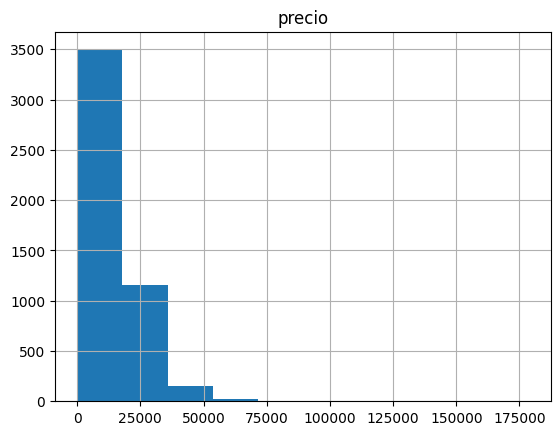

In [ ]:
df8.hist('precio')

In [ ]:
df8[df8['precio'].isnull()]

,marca,modelo,km,potencia,tipo_gasolina,color,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,...,fecha_venta_NOMBREDIA,fecha_venta_ANIO,fecha_venta_DIA,fecha_venta_MES,fecha_registro_HORA,fecha_registro_NOMBREDIA,fecha_registro_ANIO,fecha_registro_DIA,fecha_registro_MES,gps_int
117,BMW,420,174740.0,135.0,diesel,SIN COLOR,True,True,True,True,...,Tuesday,2018.0,1.0,5.0,0.0,Friday,2013.0,1.0,11.0,1
523,BMW,520,163803.0,135.0,diesel,grey,False,True,True,False,...,Thursday,2018.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,1
538,BMW,316,34489.0,85.0,diesel,black,True,False,False,False,...,Thursday,2018.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,1
548,BMW,318,157129.0,100.0,diesel,blue,True,NaN,True,True,...,Thursday,2018.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,1
568,BMW,320,166866.0,120.0,diesel,blue,True,True,False,True,...,Thursday,2018.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,1
583,BMW,320,114771.0,135.0,diesel,blue,False,True,False,False,...,Thursday,2018.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
mean_precio = df8['precio'].mean()

In [ ]:
df9 = df8.copy()

In [ ]:
df9['precio'].fillna(mean_precio, inplace = True)

array([[<Axes: title={'center': 'precio'}>]], dtype=object)

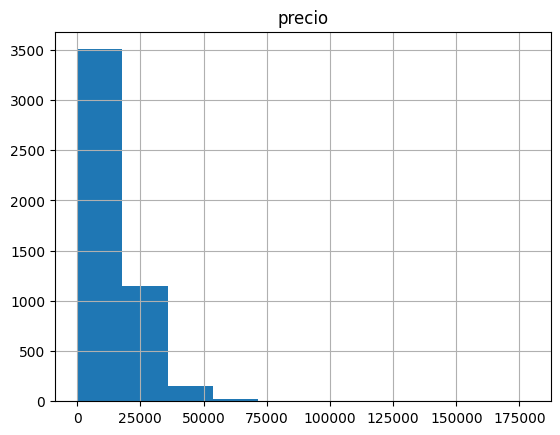

In [ ]:
df9.hist('precio')

In [ ]:
df9.isnull().sum()

marca                          0
modelo                         0
km                             0
potencia                       0
tipo_gasolina                  0
color                          0
volante_regulable              4
aire_acondicionado           486
camara_trasera                 2
elevalunas_electrico           2
bluetooth                    727
alerta_lim_velocidad         727
precio                         0
fecha_venta_HORA               1
fecha_venta_NOMBREDIA          1
fecha_venta_ANIO               1
fecha_venta_DIA                1
fecha_venta_MES                1
fecha_registro_HORA         2421
fecha_registro_NOMBREDIA    2421
fecha_registro_ANIO         2421
fecha_registro_DIA          2421
fecha_registro_MES          2421
gps_int                        0
dtype: int64

In [ ]:
df9[df9['volante_regulable'].isnull()]

,marca,modelo,km,potencia,tipo_gasolina,color,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,...,fecha_venta_NOMBREDIA,fecha_venta_ANIO,fecha_venta_DIA,fecha_venta_MES,fecha_registro_HORA,fecha_registro_NOMBREDIA,fecha_registro_ANIO,fecha_registro_DIA,fecha_registro_MES,gps_int
66,BMW,320,93066.0,135.0,diesel,black,NaN,False,False,True,...,Friday,2018.0,1.0,6.0,0.0,Tuesday,2013.0,1.0,1.0,1
272,BMW,318,195032.0,100.0,diesel,grey,NaN,NaN,False,False,...,Monday,2018.0,1.0,1.0,0.0,Tuesday,2008.0,1.0,1.0,1
488,BMW,320,227691.0,135.0,diesel,black,NaN,True,False,False,...,Thursday,2018.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,1
613,BMW,318,201626.0,105.0,diesel,black,NaN,NaN,False,True,...,Thursday,2018.0,1.0,3.0,0.0,Tuesday,2013.0,1.0,10.0,1


In [ ]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4840 entries, 0 to 4839
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   marca                     4840 non-null   object 
 1   modelo                    4840 non-null   object 
 2   km                        4840 non-null   float64
 3   potencia                  4840 non-null   float64
 4   tipo_gasolina             4840 non-null   object 
 5   color                     4840 non-null   object 
 6   volante_regulable         4836 non-null   object 
 7   aire_acondicionado        4354 non-null   object 
 8   camara_trasera            4838 non-null   object 
 9   elevalunas_electrico      4838 non-null   object 
 10  bluetooth                 4113 non-null   object 
 11  alerta_lim_velocidad      4113 non-null   object 
 12  precio                    4840 non-null   float64
 13  fecha_venta_HORA          4839 non-null   float64
 14  fecha_ve

In [ ]:
df10 = df9.copy()

In [ ]:
df9.shape

(4840, 24)

In [ ]:
df10.head()

,marca,modelo,km,potencia,tipo_gasolina,color,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,...,fecha_venta_NOMBREDIA,fecha_venta_ANIO,fecha_venta_DIA,fecha_venta_MES,fecha_registro_HORA,fecha_registro_NOMBREDIA,fecha_registro_ANIO,fecha_registro_DIA,fecha_registro_MES,gps_int
0,BMW,118,140411.0,100.0,diesel,black,True,True,False,True,...,Monday,2018.0,1.0,1.0,0.0,Wednesday,2012.0,1.0,2.0,1
1,BMW,M4,13929.0,317.0,petrol,grey,True,True,False,False,...,Thursday,2018.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,1
2,BMW,320,183297.0,120.0,diesel,white,False,False,False,True,...,Thursday,2018.0,1.0,2.0,0.0,Sunday,2012.0,1.0,4.0,1
3,BMW,420,128035.0,135.0,diesel,red,True,True,False,True,...,Thursday,2018.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,1
4,BMW,425,97097.0,160.0,diesel,silver,True,True,False,False,...,Sunday,2018.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
del(df10['fecha_registro_HORA'])

In [ ]:
del(df10['fecha_registro_NOMBREDIA'])

In [ ]:
del(df10['fecha_registro_ANIO'])

In [ ]:
del(df10['fecha_registro_DIA'])

In [ ]:
del(df10['fecha_registro_MES'])

In [ ]:
df10.isnull().sum()

marca                      0
modelo                     0
km                         0
potencia                   0
tipo_gasolina              0
color                      0
volante_regulable          4
aire_acondicionado       486
camara_trasera             2
elevalunas_electrico       2
bluetooth                727
alerta_lim_velocidad     727
precio                     0
fecha_venta_HORA           1
fecha_venta_NOMBREDIA      1
fecha_venta_ANIO           1
fecha_venta_DIA            1
fecha_venta_MES            1
gps_int                    0
dtype: int64

In [ ]:
df10.shape

(4840, 19)

In [ ]:
df11 = df10.copy()

In [ ]:
df11['aire_acondicionado'].fillna('SIN REGISTRO', inplace=True)

In [ ]:
df11['bluetooth'].fillna('SIN REGISTRO', inplace = True)

In [ ]:
df11['alerta_lim_velocidad'].fillna('SIN REGISTRO', inplace = True)

In [ ]:
df11.isnull().sum()

marca                    0
modelo                   0
km                       0
potencia                 0
tipo_gasolina            0
color                    0
volante_regulable        4
aire_acondicionado       0
camara_trasera           2
elevalunas_electrico     2
bluetooth                0
alerta_lim_velocidad     0
precio                   0
fecha_venta_HORA         1
fecha_venta_NOMBREDIA    1
fecha_venta_ANIO         1
fecha_venta_DIA          1
fecha_venta_MES          1
gps_int                  0
dtype: int64

In [ ]:
df11.dropna(inplace=True)

In [ ]:
df11.shape

(4831, 19)

In [ ]:
df11.isnull().sum()

marca                    0
modelo                   0
km                       0
potencia                 0
tipo_gasolina            0
color                    0
volante_regulable        0
aire_acondicionado       0
camara_trasera           0
elevalunas_electrico     0
bluetooth                0
alerta_lim_velocidad     0
precio                   0
fecha_venta_HORA         0
fecha_venta_NOMBREDIA    0
fecha_venta_ANIO         0
fecha_venta_DIA          0
fecha_venta_MES          0
gps_int                  0
dtype: int64

In [ ]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4831 entries, 0 to 4839
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   marca                  4831 non-null   object 
 1   modelo                 4831 non-null   object 
 2   km                     4831 non-null   float64
 3   potencia               4831 non-null   float64
 4   tipo_gasolina          4831 non-null   object 
 5   color                  4831 non-null   object 
 6   volante_regulable      4831 non-null   object 
 7   aire_acondicionado     4831 non-null   object 
 8   camara_trasera         4831 non-null   object 
 9   elevalunas_electrico   4831 non-null   object 
 10  bluetooth              4831 non-null   object 
 11  alerta_lim_velocidad   4831 non-null   object 
 12  precio                 4831 non-null   float64
 13  fecha_venta_HORA       4831 non-null   float64
 14  fecha_venta_NOMBREDIA  4831 non-null   object 
 15  fech

In [ ]:
df11.reset_index(drop = True, inplace = True)

In [ ]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4831 entries, 0 to 4830
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   marca                  4831 non-null   object 
 1   modelo                 4831 non-null   object 
 2   km                     4831 non-null   float64
 3   potencia               4831 non-null   float64
 4   tipo_gasolina          4831 non-null   object 
 5   color                  4831 non-null   object 
 6   volante_regulable      4831 non-null   object 
 7   aire_acondicionado     4831 non-null   object 
 8   camara_trasera         4831 non-null   object 
 9   elevalunas_electrico   4831 non-null   object 
 10  bluetooth              4831 non-null   object 
 11  alerta_lim_velocidad   4831 non-null   object 
 12  precio                 4831 non-null   float64
 13  fecha_venta_HORA       4831 non-null   float64
 14  fecha_venta_NOMBREDIA  4831 non-null   object 
 15  fech

In [ ]:
df12 = df11.copy()  #Nulos limpios

In [ ]:
df12['volante_regulable_int']= (df12['volante_regulable']==True).astype(int)

In [ ]:
df12['volante_regulable_int']= (df12['volante_regulable']==True).astype(int)

In [ ]:
df12['aire_acondicionado_int']= (df12['aire_acondicionado']==True).astype(int)

In [ ]:
df12['camara_trasera_int']= (df12['camara_trasera']==True).astype(int)

In [ ]:
df12['elevalunas_electrico_int']= (df12['elevalunas_electrico']==True).astype(int)

In [ ]:
df12['bluetooth_int']= (df12['bluetooth']==True).astype(int)

In [ ]:
df12['alerta_lim_velocidad_int']= (df12['alerta_lim_velocidad']==True).astype(int)

In [ ]:
df13 = df12.copy()

In [ ]:
df13.head()

,marca,modelo,km,potencia,tipo_gasolina,color,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,...,fecha_venta_ANIO,fecha_venta_DIA,fecha_venta_MES,gps_int,volante_regulable_int,aire_acondicionado_int,camara_trasera_int,elevalunas_electrico_int,bluetooth_int,alerta_lim_velocidad_int
0,BMW,118,140411.0,100.0,diesel,black,True,True,False,True,...,2018.0,1.0,1.0,1,1,1,0,1,0,0
1,BMW,M4,13929.0,317.0,petrol,grey,True,True,False,False,...,2018.0,1.0,2.0,1,1,1,0,0,1,1
2,BMW,320,183297.0,120.0,diesel,white,False,False,False,True,...,2018.0,1.0,2.0,1,0,0,0,1,0,0
3,BMW,420,128035.0,135.0,diesel,red,True,True,False,True,...,2018.0,1.0,2.0,1,1,1,0,1,1,0
4,BMW,425,97097.0,160.0,diesel,silver,True,True,False,False,...,2018.0,1.0,4.0,1,1,1,0,0,1,1


In [ ]:
del(df13['volante_regulable'])

In [ ]:
del(df13['aire_acondicionado'])

In [ ]:
del(df13['camara_trasera'])

In [ ]:
del(df13['elevalunas_electrico'])

In [ ]:
del(df13['bluetooth'])

In [ ]:
del(df13['alerta_lim_velocidad'])

In [ ]:
df13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4831 entries, 0 to 4830
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   marca                     4831 non-null   object 
 1   modelo                    4831 non-null   object 
 2   km                        4831 non-null   float64
 3   potencia                  4831 non-null   float64
 4   tipo_gasolina             4831 non-null   object 
 5   color                     4831 non-null   object 
 6   precio                    4831 non-null   float64
 7   fecha_venta_HORA          4831 non-null   float64
 8   fecha_venta_NOMBREDIA     4831 non-null   object 
 9   fecha_venta_ANIO          4831 non-null   float64
 10  fecha_venta_DIA           4831 non-null   float64
 11  fecha_venta_MES           4831 non-null   float64
 12  gps_int                   4831 non-null   int64  
 13  volante_regulable_int     4831 non-null   int64  
 14  aire_aco

In [ ]:
target=["precio"]
def tipo_variables(dataset):
  lista_numerica=[]
  lista_boolean=[]
  lista_categorica=[]
  for i in dataset:
    if (dataset[i].dtype.kind=='f' or dataset[i].dtype.kind=='i') and dataset[i].nunique()!=2 and i not in target:
      lista_numerica.append(i)
    if (dataset[i].dtype.kind=='f' or dataset[i].dtype.kind=='i') and dataset[i].nunique()==2 and i not in target:
      lista_boolean.append(i)
    if dataset[i].dtype.kind=='O':
      lista_categorica.append(i)

  return lista_numerica,lista_boolean,lista_categorica



In [ ]:
lnum,lbool,lcat = tipo_variables(df13)

In [ ]:
lnum

['km',
 'potencia',
 'fecha_venta_HORA',
 'fecha_venta_ANIO',
 'fecha_venta_DIA',
 'fecha_venta_MES']

In [ ]:
lbool

['gps_int',
 'volante_regulable_int',
 'aire_acondicionado_int',
 'camara_trasera_int',
 'elevalunas_electrico_int',
 'bluetooth_int',
 'alerta_lim_velocidad_int']

In [ ]:
df13['fecha_venta_ANIO'].unique()

array([2018., 2007., 2010., 2009., 2008.])

In [ ]:
lcat

['marca', 'modelo', 'tipo_gasolina', 'color', 'fecha_venta_NOMBREDIA']

In [ ]:
df13.shape

(4831, 19)

[[<Axes: title={'center': 'km'}>]]
[[<Axes: title={'center': 'potencia'}>]]
[[<Axes: title={'center': 'fecha_venta_HORA'}>]]
[[<Axes: title={'center': 'fecha_venta_ANIO'}>]]
[[<Axes: title={'center': 'fecha_venta_DIA'}>]]
[[<Axes: title={'center': 'fecha_venta_MES'}>]]


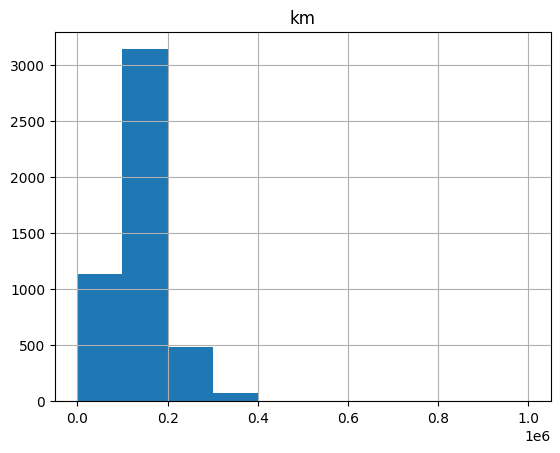

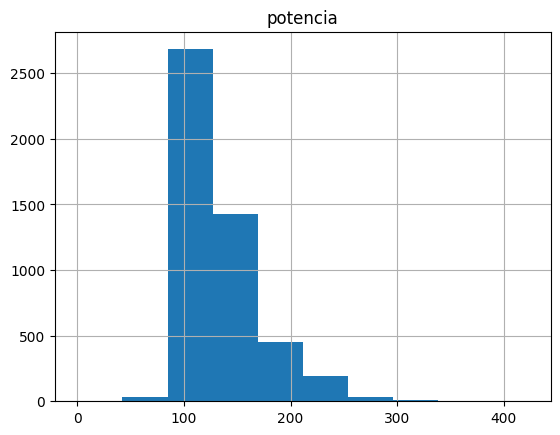

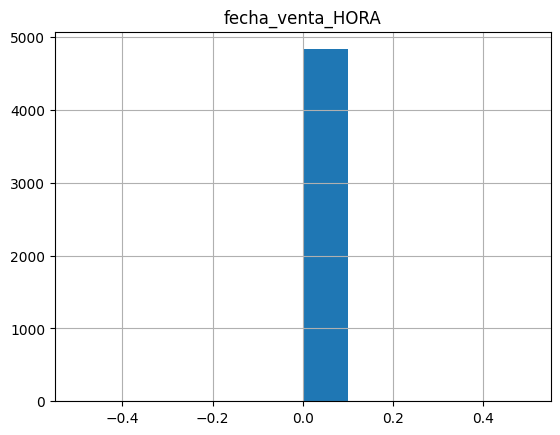

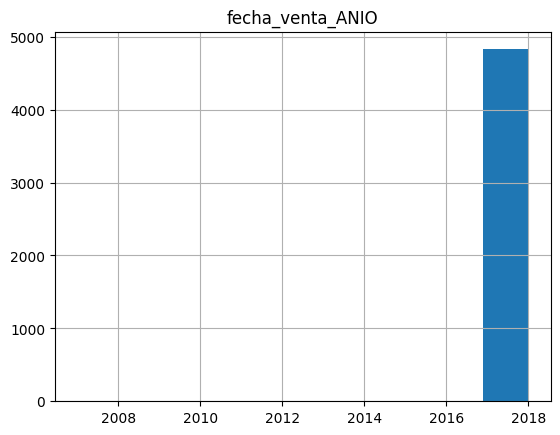

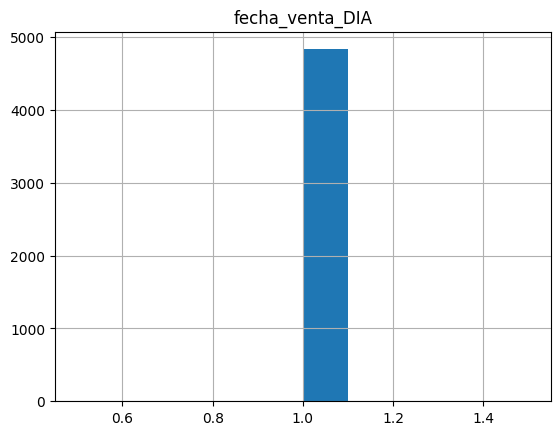

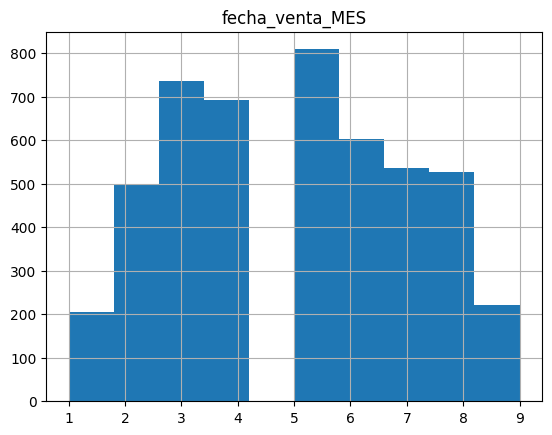

In [ ]:
for i in lnum:
  print(df13.hist(i))

In [ ]:
df13[df13['km']<0]

,marca,modelo,km,potencia,tipo_gasolina,color,precio,fecha_venta_HORA,fecha_venta_NOMBREDIA,fecha_venta_ANIO,fecha_venta_DIA,fecha_venta_MES,gps_int,volante_regulable_int,aire_acondicionado_int,camara_trasera_int,elevalunas_electrico_int,bluetooth_int,alerta_lim_velocidad_int
2928,BMW,640 Gran Coupé,-64.0,230.0,diesel,black,75000.0,0.0,Sunday,2018.0,1.0,4.0,1,1,1,0,0,0,1


In [ ]:
df13[df13['km']>=400000]

,marca,modelo,km,potencia,tipo_gasolina,color,precio,fecha_venta_HORA,fecha_venta_NOMBREDIA,fecha_venta_ANIO,fecha_venta_DIA,fecha_venta_MES,gps_int,volante_regulable_int,aire_acondicionado_int,camara_trasera_int,elevalunas_electrico_int,bluetooth_int,alerta_lim_velocidad_int
549,BMW,520,484615.0,120.0,diesel,blue,8300.0,0.0,Thursday,2018.0,1.0,3.0,1,1,1,0,0,0,0
1563,BMW,320,400654.0,110.0,diesel,black,1800.0,0.0,Sunday,2018.0,1.0,7.0,1,0,0,1,0,0,0
2340,BMW,318,477571.0,85.0,diesel,grey,1200.0,0.0,Sunday,2018.0,1.0,7.0,0,0,1,0,0,1,0
2819,BMW,525,439060.0,105.0,diesel,silver,100.0,0.0,Thursday,2018.0,1.0,3.0,1,0,0,1,0,0,0
3188,BMW,320,405816.0,100.0,diesel,blue,500.0,0.0,Tuesday,2018.0,1.0,5.0,1,0,0,0,0,0,0
3722,BMW,118,1000376.0,90.0,diesel,SIN COLOR,1400.0,0.0,Friday,2018.0,1.0,6.0,1,1,0,0,0,0,0


In [ ]:
df13[(df13['km']<0) | (df13['km']>=400000)]

,marca,modelo,km,potencia,tipo_gasolina,color,precio,fecha_venta_HORA,fecha_venta_NOMBREDIA,fecha_venta_ANIO,fecha_venta_DIA,fecha_venta_MES,gps_int,volante_regulable_int,aire_acondicionado_int,camara_trasera_int,elevalunas_electrico_int,bluetooth_int,alerta_lim_velocidad_int
549,BMW,520,484615.0,120.0,diesel,blue,8300.0,0.0,Thursday,2018.0,1.0,3.0,1,1,1,0,0,0,0
1563,BMW,320,400654.0,110.0,diesel,black,1800.0,0.0,Sunday,2018.0,1.0,7.0,1,0,0,1,0,0,0
2340,BMW,318,477571.0,85.0,diesel,grey,1200.0,0.0,Sunday,2018.0,1.0,7.0,0,0,1,0,0,1,0
2819,BMW,525,439060.0,105.0,diesel,silver,100.0,0.0,Thursday,2018.0,1.0,3.0,1,0,0,1,0,0,0
2928,BMW,640 Gran Coupé,-64.0,230.0,diesel,black,75000.0,0.0,Sunday,2018.0,1.0,4.0,1,1,1,0,0,0,1
3188,BMW,320,405816.0,100.0,diesel,blue,500.0,0.0,Tuesday,2018.0,1.0,5.0,1,0,0,0,0,0,0
3722,BMW,118,1000376.0,90.0,diesel,SIN COLOR,1400.0,0.0,Friday,2018.0,1.0,6.0,1,1,0,0,0,0,0


In [ ]:
media_km =

In [ ]:
df13['km'].unique()

array([140411.,  13929., 183297., ...,  19633.,  27920., 195840.])

In [ ]:
df13[df13['potencia']<70]

,marca,modelo,km,potencia,tipo_gasolina,color,precio,fecha_venta_HORA,fecha_venta_NOMBREDIA,fecha_venta_ANIO,fecha_venta_DIA,fecha_venta_MES,gps_int,volante_regulable_int,aire_acondicionado_int,camara_trasera_int,elevalunas_electrico_int,bluetooth_int,alerta_lim_velocidad_int
1786,BMW,i3,152328.0,25.0,hybrid_petrol,black,20300.0,0.0,Sunday,2018.0,1.0,4.0,1,0,1,0,0,0,0
1915,BMW,i3,152470.0,25.0,hybrid_petrol,black,15500.0,0.0,Thursday,2018.0,1.0,3.0,1,0,1,0,0,0,1
2380,BMW,318,170529.0,66.0,diesel,silver,1000.0,0.0,Wednesday,2018.0,1.0,8.0,0,0,0,1,0,0,0
2761,BMW,316,146951.0,66.0,petrol,white,1300.0,0.0,Sunday,2018.0,1.0,4.0,0,0,0,0,0,0,0
3755,BMW,X1,81770.0,0.0,diesel,white,11700.0,0.0,Thursday,2018.0,1.0,3.0,0,0,0,0,0,0,0


In [ ]:
df13[df13['potencia']>280]

,marca,modelo,km,potencia,tipo_gasolina,color,precio,fecha_venta_HORA,fecha_venta_NOMBREDIA,fecha_venta_ANIO,fecha_venta_DIA,fecha_venta_MES,gps_int,volante_regulable_int,aire_acondicionado_int,camara_trasera_int,elevalunas_electrico_int,bluetooth_int,alerta_lim_velocidad_int
1,BMW,M4,13929.0,317.0,petrol,grey,69700.0,0.0,Thursday,2018.0,1.0,2.0,1,1,1,0,0,1,1
65,BMW,M3,29925.0,309.0,petrol,silver,47000.0,0.0,Sunday,2018.0,1.0,4.0,1,1,1,0,1,1,1
70,BMW,M4,69410.0,317.0,petrol,white,53600.0,0.0,Thursday,2018.0,1.0,3.0,1,1,1,0,0,1,1
71,BMW,M3,170550.0,309.0,petrol,grey,28000.0,0.0,Thursday,2018.0,1.0,3.0,1,1,1,0,1,0,1
91,BMW,M3,99283.0,309.0,petrol,silver,28600.0,0.0,Sunday,2018.0,1.0,4.0,1,0,0,0,1,0,1
137,BMW,M3,169970.0,309.0,petrol,grey,35700.0,0.0,Wednesday,2018.0,1.0,8.0,1,1,1,0,1,0,1
2934,BMW,M3,33670.0,317.0,petrol,blue,51200.0,0.0,Sunday,2018.0,1.0,4.0,1,1,1,0,0,1,1
3082,BMW,M3,39250.0,317.0,petrol,black,52400.0,0.0,Tuesday,2018.0,1.0,5.0,1,1,1,0,0,1,1
3591,BMW,M5,150187.0,412.0,petrol,white,41600.0,0.0,Saturday,2018.0,1.0,9.0,1,1,1,1,1,1,1
4136,BMW,X6 M,2970.0,423.0,petrol,red,82400.0,0.0,Sunday,2018.0,1.0,4.0,1,1,0,1,0,0,1


In [ ]:
df13['potencia'].unique()

array([100.        , 317.        , 120.        , 135.        ,
       160.        , 225.        , 145.        , 105.        ,
       125.        , 130.        , 270.        , 110.        ,
       140.        , 180.        ,  85.        , 190.        ,
       236.        , 240.        , 250.        , 230.        ,
       309.        , 170.        , 142.        , 155.        ,
       210.        , 128.99566026, 122.        , 200.        ,
        90.        , 150.        , 141.        , 173.        ,
       137.        , 280.        , 112.        , 189.        ,
        80.        , 119.        ,  95.        , 220.        ,
       107.        , 127.        ,  25.        ,  70.        ,
       192.        , 101.        ,  75.        , 239.        ,
       235.        ,  87.        ,  66.        ,  77.        ,
       195.        , 183.        , 233.        , 121.        ,
       224.        , 412.        ,   0.        , 423.        ,
       300.        , 261.        ])

In [ ]:
df13['fecha_venta_HORA'].unique()

array([0.])

In [ ]:
df13['fecha_venta_ANIO'].unique()

array([2018., 2007., 2010., 2009., 2008.])

In [ ]:
(df13['fecha_venta_ANIO'] == 2008).sum()

1

In [ ]:
(df13['fecha_venta_ANIO'] == 2009).sum()

1

In [ ]:
(df13['fecha_venta_ANIO'] == 2010).sum()

1

In [ ]:
(df13['fecha_venta_ANIO'] == 2007).sum()

1

In [ ]:
(df13['fecha_venta_ANIO'] == 2018).sum()

4827

In [ ]:
rango_fechas = df13[df13[df13['fecha_venta_ANIO'] == ]]

In [ ]:
while

In [ ]:
df13['fecha_venta_MES'].nunique()

9

In [ ]:
df13['fecha_venta_DIA'].unique()

array([1.])

In [ ]:
for i in lbool:
  print(df13.value_counts())

marca  modelo            km        potencia  tipo_gasolina  color  precio   fecha_venta_HORA  fecha_venta_NOMBREDIA  fecha_venta_ANIO  fecha_venta_DIA  fecha_venta_MES  gps_int  volante_regulable_int  aire_acondicionado_int  camara_trasera_int  elevalunas_electrico_int  bluetooth_int  alerta_lim_velocidad_int
BMW     Active Tourer    48380.0   100.0     diesel         black  19000.0  0.0               Tuesday                2018.0            1.0              5.0              1        1                      0                       0                   0                         0              0                           1
       520 Gran Turismo  183601.0  135.0     diesel         black  16100.0  0.0               Friday                 2018.0            1.0              6.0              1        1                      1                       1                   1                         0              1                           1
                         149967.0  135.0     diesel      

In [ ]:
for i in lcat:
  print(df13.value_counts())

marca  modelo            km        potencia  tipo_gasolina  color  precio   fecha_venta_HORA  fecha_venta_NOMBREDIA  fecha_venta_ANIO  fecha_venta_DIA  fecha_venta_MES  gps_int  volante_regulable_int  aire_acondicionado_int  camara_trasera_int  elevalunas_electrico_int  bluetooth_int  alerta_lim_velocidad_int
BMW     Active Tourer    48380.0   100.0     diesel         black  19000.0  0.0               Tuesday                2018.0            1.0              5.0              1        1                      0                       0                   0                         0              0                           1
       520 Gran Turismo  183601.0  135.0     diesel         black  16100.0  0.0               Friday                 2018.0            1.0              6.0              1        1                      1                       1                   1                         0              1                           1
                         149967.0  135.0     diesel      